In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('video_fps_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

  tipo                                  video  frame image_size  threshold      time        fps
0  CPU  ejercicio02 - izquierda obstaculo.mp4      0    480x864        0.1  0.339471   2.945761
1  CPU  ejercicio02 - izquierda obstaculo.mp4      5    480x864        0.1  0.088957  11.241377
2  CPU  ejercicio02 - izquierda obstaculo.mp4     10    480x864        0.1  0.093775  10.663819
3  CPU  ejercicio02 - izquierda obstaculo.mp4     15    480x864        0.1  0.103746   9.638932
4  CPU  ejercicio02 - izquierda obstaculo.mp4     20    480x864        0.1  0.095448  10.476907


/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_7469/3297449262.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


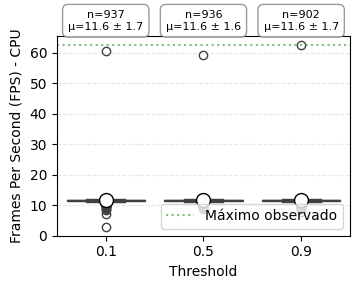

In [2]:
# Filtrar datos de CPU
df_cpu = df[df['tipo'] == 'CPU']

plt.figure(figsize=(3.7, 3))  # Aumentar tamaño para mejor legibilidad

# Configurar el tamaño de fuente global
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Boxplot para FPS
ax = sns.boxplot(
    data=df_cpu,
    x='threshold',
    y='fps',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':10},
    palette='Blues'
)

# Personalización del gráfico
plt.xlabel('Threshold')
plt.ylabel('Frames Per Second (FPS) - CPU')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calcular estadísticas para cada threshold
fps_stats = df_cpu.groupby('threshold')['fps'].agg(['count', 'mean', 'std'])

# Añadir anotaciones de estadísticas
for i, threshold in enumerate(fps_stats.index):
    plt.text(
        i, df_cpu['fps'].max() * 1.08,  # Posición ajustada al máximo FPS
        f"n={int(fps_stats.loc[threshold, 'count'])}\nμ={fps_stats.loc[threshold, 'mean']:.1f} ± {fps_stats.loc[threshold, 'std']:.1f}",
        ha='center',
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
    )

# Añadir línea horizontal de referencia (opcional)
max_fps = df_cpu['fps'].max()
plt.axhline(y=max_fps, color='green', linestyle=':', alpha=0.5, label='Máximo observado')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Histogramas

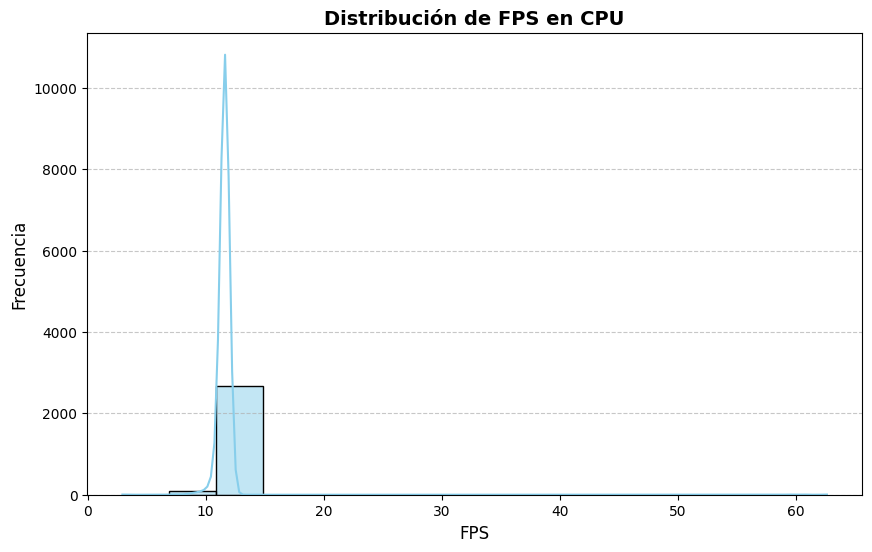

In [3]:
# Filtrar datos de CPU
df_cpu = df[df['tipo'] == 'CPU']

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_cpu['fps'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de FPS en CPU', fontweight='bold', fontsize=14)
plt.xlabel('FPS', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

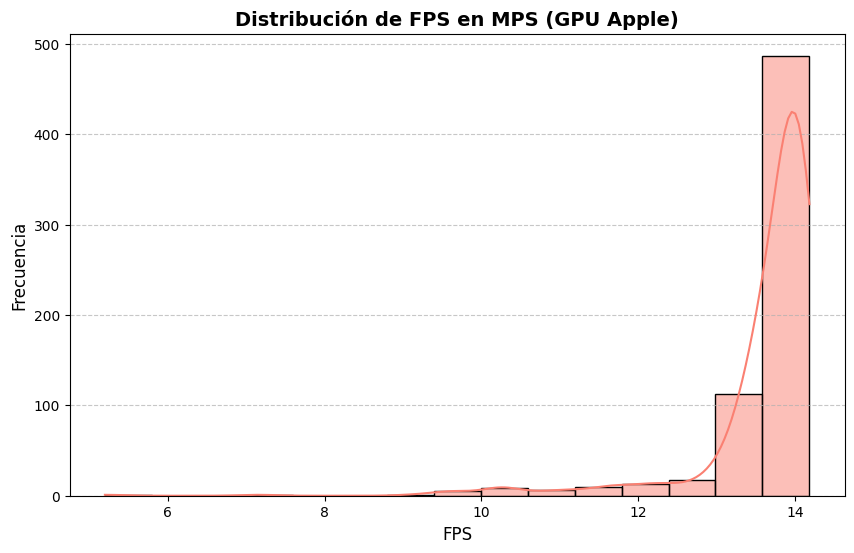

In [3]:
# Filtrar datos de MPS
df_mps = df[df['tipo'] == 'GPU']

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_mps['fps'], bins=15, kde=True, color='salmon', edgecolor='black')
plt.title('Distribución de FPS en MPS (GPU Apple)', fontweight='bold', fontsize=14)
plt.xlabel('FPS', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
ap_stats = df.groupby('threshold')['fps'].describe()
print(ap_stats.to_string())

            count       mean       std      min        25%        50%        75%         max
threshold                                                                                   
0.1        1874.0  14.154822  3.072693  5.89834  14.066396  14.103147  14.136813  109.027918
0.5        1874.0  14.166016  3.082311  8.09191  14.063602  14.103265  14.135896  108.875091
0.9        1874.0  14.156284  3.042026  9.63716  14.067246  14.104759  14.136229  107.123257


/var/folders/_q/szr0xx2x2574ld56dn__98zc0000gn/T/ipykernel_75623/557839275.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


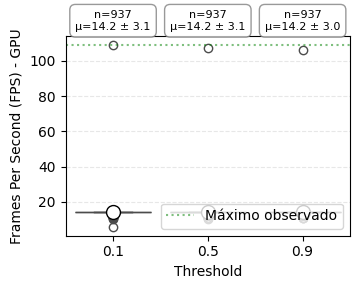

In [4]:
# Filtrar datos de CPU
df_cpu = df[df['tipo'] == 'GPU']

plt.figure(figsize=(3.7, 3))  # Aumentar tamaño para mejor legibilidad

# Configurar el tamaño de fuente global
plt.rcParams.update({
    'font.size': 10,
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# Boxplot para FPS
ax = sns.boxplot(
    data=df_cpu,
    x='threshold',
    y='fps',
    showmeans=True,
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':10},
    palette='deep'
)

# Personalización del gráfico
plt.xlabel('Threshold')
plt.ylabel('Frames Per Second (FPS) - GPU')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Calcular estadísticas para cada threshold
fps_stats = df_cpu.groupby('threshold')['fps'].agg(['count', 'mean', 'std'])

# Añadir anotaciones de estadísticas
for i, threshold in enumerate(fps_stats.index):
    plt.text(
        i, df_cpu['fps'].max() * 1.08,  # Posición ajustada al máximo FPS
        f"n={int(fps_stats.loc[threshold, 'count'])}\nμ={fps_stats.loc[threshold, 'mean']:.1f} ± {fps_stats.loc[threshold, 'std']:.1f}",
        ha='center',
        fontsize=8,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round,pad=0.5')
    )

# Añadir línea horizontal de referencia (opcional)
max_fps = df_cpu['fps'].max()
plt.axhline(y=max_fps, color='green', linestyle=':', alpha=0.5, label='Máximo observado')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()